In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import volterra

Решим уравнение Вольтерры двумя способами: простые итерации и квадратурно
Зададим начальные параметры

In [4]:
x_ax = np.linspace(0,1)

#зададим ядро
ker = lambda xn, tn : np.exp(xn - tn)
kernel = np.zeros((len(x_ax), len(x_ax)))

for i in range(len(x_ax)):
    for j in range(i + 1):
        kernel[i, j] = ker(x_ax[i], x_ax[j])
        
#зададим правую часть
right_part_l = lambda x: np.exp(x)
right_part = np.exp(x_ax)

#аналитическое решение
analytical = 2*np.exp(x_ax) - 1

In [5]:
# #решим квадратурно
# quad_solution = None
# quad_solution, err_0 = volterra.quad_solve(right_part, kernel, iterations=11, analytical=analytical)
# plt.figure(1)
# # plt.subplot(1,2, 1)
# plt.title(f'Решение квадратурным способом ({11} итераций)')
# plt.plot(x_ax, quad_solution, label='численно')
# plt.plot(x_ax, analytical, label='точное решение')
# plt.legend()

![Alt text](quad_11.png)

In [6]:
# #ошибка от числа итераций
# quad_sol_0, quad_error = volterra.quad_solve(right_part, kernel, iterations=100, analytical=analytical)

# # plt.subplot(1,2, 2)
# plt.plot(range(100 + 1), quad_error)
# plt.xlabel('итерация')
# plt.ylabel('относительная ошибка')

Из-за особенностей юпитера я прикреплю графики отдельно
![Alt text](quad_iter_err.png)

Наименьшая ошибка при 11-12 итерациях

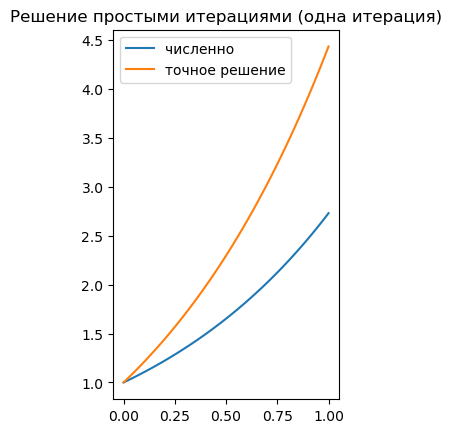

In [7]:
#решим простыми итерациями
iter_solution, _ = volterra.solve_iter(ker, right_part_l, x_ax, h=1e-4)

plt.figure(2)
plt.subplot(1,2, 1)
plt.title('Решение простыми итерациями (одна итерация)')
plt.plot(x_ax, iter_solution, label='численно')
plt.plot(x_ax, analytical, label='точное решение')
plt.legend()

# iterations = 10
# _, iter_error = volterra.iter_solve(right_part, kernel, iterations=iterations, analytical=analytical)
# plt.subplot(1,2,2)
# plt.plot(range(iterations + 1), iter_error)
# plt.xlabel('итерация')
# plt.ylabel('абсолютная ошибка')

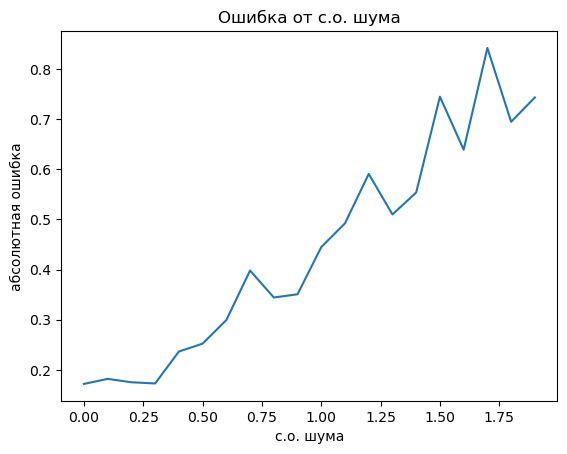

In [8]:
# # Рассмотрим квадратурный метод, так как он реализован лучще всего.
# # Зафиксируем число итераций, когда ошибка минимальна, будем добавлять шум с разным отклонением и смотреть на ошибку
# # Будем менять отклонение в диапазоне от 0 до 0.1
# n = 20
# noise_error = np.empty(n)
# for i in range(n):
#     noise = np.random.normal(0,i*1e-1, len(right_part))
#     quad_solution, err = volterra.quad_solve(right_part + noise, kernel, iterations=11, analytical=analytical)
#     noise_error[i] = err[-1]

# plt.figure(3)
# plt.title('Ошибка от с.о. шума')
# plt.plot([k*1e-1 for k in range(n)], noise_error)
# plt.xlabel('с.о. шума')
# plt.ylabel('относительная ошибка')

# plt.show()